<a href="https://colab.research.google.com/github/vam-09/MLnow_2.0/blob/main/Multivariate(House_Price).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To download Dataset on the below link one will have to proceed to data files in it...

link -> Data-files -> 1. ST Academy - Crash course and Regression files -> House_Price.csv

[Link to Download the dataset](https://starttechacademy.com/machine-learning-deep-learning-in-python-r/)


**Reach out**:
[Email](vaibhavimekhe@gmail.com) | [GitHub](https://github.com/vam-09) | [LinkedIn](www.linkedin.com/in/vaibhavimekhe)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd'/content/drive/MyDrive/ml'

/content/drive/MyDrive/ml


In [ ]:
ls

cleanedMathData.csv  New.ipynb           student-merge.R  titanic/
EDA.ipynb            student-mat.csv     student-por.csv  Untitled0.ipynb
House_Price.csv      student-mat.gsheet  student.txt


In [ ]:
import os

In [ ]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [ ]:
df = pd.read_csv('House_Price.csv', header=0) #load the csv file as dataframe

In [ ]:
df.head(10) #print the first ten rows of the dataframe

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
5,28.7,0.02985,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.2296,None,53,YES,0.045910
6,22.9,0.08829,37.87,0.524,6.012,66.6,5.87,5.47,5.70,5.20,24.8,12.43,YES,6.958,12.1832,River,41,YES,0.052170
7,22.1,0.14455,37.87,0.524,6.172,96.1,6.04,5.85,6.25,5.66,24.8,19.15,NO,5.842,12.1768,Lake,56,YES,0.057075
8,16.5,0.21124,37.87,0.524,5.631,100.0,6.18,5.85,6.30,6.00,24.8,29.93,YES,5.930,12.1320,None,55,YES,0.056302
9,18.9,0.17004,37.87,0.524,6.004,85.9,6.67,6.55,6.85,6.29,24.8,17.10,YES,9.478,14.1512,River,45,YES,0.050727


## Data Processing

Categorical to numeric value conversion

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [ ]:
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [ ]:
uv = np.percentile(df.n_hot_rooms,[99])[0]

In [ ]:
df[(df.n_hot_rooms>uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [ ]:
df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
np.percentile(df.rainfall,[1])[0]

20.0

In [ ]:
lv = np.percentile(df.rainfall,[1])[0]

In [ ]:
df[(df.rainfall < lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [ ]:
df.rainfall[(df.rainfall < 0.3*lv)] = 0.3 * lv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

### As only n_hot_beds has lesst value than 506 we ca conclude it has missing values

In [ ]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [ ]:
df.crime_rate=np.log(1+df.crime_rate)

In [ ]:
df["avg_dist"]=(df.dist1+df.dist2+df.dist3+df.dist4)/4

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,6.0625


In [ ]:
del df["dist1"]
del df["dist2"]
del df["dist3"]
del df["dist4"]
del df["bus_ter"]

In [ ]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0,0


In [ ]:
del df["airport_NO"]
del df["waterbody_None"]

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


In [ ]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.056570,0.082151,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096


In [ ]:
del df["parks"]

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


## Data Visualization

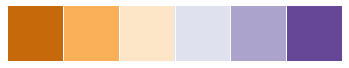

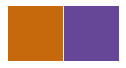

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [ ]:
df.columns #columns in the dataframe
len(df.columns)

16

In [ ]:
#pairplot for all the values

sns.pairplot(df,
             x_vars = ['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'teachers', 'poor_prop', 'n_hos_beds', 'n_hot_rooms', 'rainfall',
       'avg_dist', 'airport_YES', 'waterbody_Lake', 'waterbody_Lake and River',
       'waterbody_River'],
             y_vars = ['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'teachers', 'poor_prop', 'n_hos_beds', 'n_hot_rooms', 'rainfall',
       'avg_dist', 'airport_YES', 'waterbody_Lake', 'waterbody_Lake and River',
       'waterbody_River'],
       diag_kind='kde'
             )

In [ ]:
del df["waterbody_River"]
del df["waterbody_Lake and River"]
del df["waterbody_Lake"]
del df["airport_YES"]

## Data Splits

In [ ]:
#80-20 train-test percent split

trainDataset = df.sample(frac=0.8, random_state=0) 
testDataset = df.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     price  crime_rate  resid_area  ...  n_hot_rooms  rainfall  avg_dist
329   22.6    0.065076       33.24  ...      14.1808        53    5.2150
371   50.0    2.325549       48.10  ...      13.4000        25    1.1700
219   23.0    0.108182       43.89  ...      13.1840        21    3.3650
403    8.3    3.250440       48.10  ...      15.0664        40    1.7025
78    21.2    0.054924       42.83  ...      15.1696        53    5.0150

[5 rows x 12 columns]
    price  crime_rate  resid_area  ...  n_hot_rooms  rainfall  avg_dist
9    18.9    0.157038       37.87  ...      14.1512        45    6.5900
25   13.9    0.610059       38.14  ...      13.1112        35    4.4550
28   18.4    0.572667       38.14  ...      15.1472        35    4.4550
31   14.5    0.856422       38.14  ...      12.1160        23    4.1750
32   13.2    0.870452       38.14  ...      14.1056        25    3.9925

[5 rows x 12 columns]


In [ ]:
print(trainDataset.shape)
print(testDataset.shape)

(405, 12)
(101, 12)


In [ ]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     price  crime_rate  resid_area  ...  n_hot_rooms  rainfall  avg_dist
329   22.6    0.065076       33.24  ...      14.1808        53    5.2150
371   50.0    2.325549       48.10  ...      13.4000        25    1.1700
219   23.0    0.108182       43.89  ...      13.1840        21    3.3650
403    8.3    3.250440       48.10  ...      15.0664        40    1.7025
78    21.2    0.054924       42.83  ...      15.1696        53    5.0150

[5 rows x 12 columns]
    price  crime_rate  resid_area  ...  n_hot_rooms  rainfall  avg_dist
9    18.9    0.157038       37.87  ...      14.1512        45    6.5900
25   13.9    0.610059       38.14  ...      13.1112        35    4.4550
28   18.4    0.572667       38.14  ...      15.1472        35    4.4550
31   14.5    0.856422       38.14  ...      12.1160        23    4.1750
32   13.2    0.870452       38.14  ...      14.1056        25    3.9925

[5 rows x 12 columns]


In [ ]:
#removing the G3 column and saving it into the labels variable


trainLabels = trainFeatures.pop('price')
testLabels = testFeatures.pop('price')

print(trainLabels.head())
print(testLabels.head())

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
Name: price, dtype: float64
9     18.9
25    13.9
28    18.4
31    14.5
32    13.2
Name: price, dtype: float64


In [ ]:
print(trainFeatures.head())
print(testFeatures.head())

     crime_rate  resid_area  air_qual  ...  n_hot_rooms  rainfall  avg_dist
329    0.065076       33.24     0.460  ...      14.1808        53    5.2150
371    2.325549       48.10     0.631  ...      13.4000        25    1.1700
219    0.108182       43.89     0.550  ...      13.1840        21    3.3650
403    3.250440       48.10     0.693  ...      15.0664        40    1.7025
78     0.054924       42.83     0.437  ...      15.1696        53    5.0150

[5 rows x 11 columns]
    crime_rate  resid_area  air_qual  ...  n_hot_rooms  rainfall  avg_dist
9     0.157038       37.87     0.524  ...      14.1512        45    6.5900
25    0.610059       38.14     0.538  ...      13.1112        35    4.4550
28    0.572667       38.14     0.538  ...      15.1472        35    4.4550
31    0.856422       38.14     0.538  ...      12.1160        23    4.1750
32    0.870452       38.14     0.538  ...      14.1056        25    3.9925

[5 rows x 11 columns]


## Model Development

In [ ]:
import math
print(trainFeatures.columns)
numFeatures = len(trainFeatures.columns)
inputNeurons = math.ceil(2*(numFeatures)/3)
print(inputNeurons)

Index(['crime_rate', 'resid_area', 'air_qual', 'room_num', 'age', 'teachers',
       'poor_prop', 'n_hos_beds', 'n_hot_rooms', 'rainfall', 'avg_dist'],
      dtype='object')
8


In [ ]:
model.compile(
    optimizer = "tf.keras.optimizers.Adam(learning_rate = 0.001)",
    loss = 'mean_absolute_error',
    metrics = ['mae', 'mse']
)

In [ ]:
numEpochs = 2000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data=(testFeatures, testLabels), epochs = numEpochs)

## Result Analysis

In [ ]:
#Plot Functions

def pltGr(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Number of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

pltGr(history, 'loss')
pltGr(history, 'mae')

In [ ]:
testPreds = model.predict(testFeatures).flatten()
print(testPreds)

In [ ]:
def predPlot(labels,preds):
  plt.scatter(labels, preds)
  plt.xlabel('true Labels')
  plt.ylabel('predicted Values')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.plot([-100, 100], [-100,100])
  plt.show()

predPlot(testLabels, testPreds)

In [ ]:
def errorPlot(preds, labels, counts):
  errors = testPreds - testLabels
  plt.hist(errors, counts)
  plt.ylabel('Counts')
  plt.xlabel('Errors')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

## Saving Models

In [ ]:
import os
modelName = f'model_01.h5'
model.save(f'{os.getcwd()}/{modelName}')

In [ ]:
model = tf.keras.models.load_model(f'{os.getcwd()}/{modelName}')

In [ ]:
model.summary()

## Conclusion


Thank you for joining me for the session.
Hoping you learned about implementing `Multivariate linear regression` problems in code.

For further understanding and clarity, feel free to understand other impactful features from exploratory data analysis. Perform hyperparameter tuning and optimization for getting a better model.
Also try to save your models so you can always access it.